In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path = '../outputs/traj'
with open(path, 'rb') as file:
    data = pickle.load(file)
    print(data)


                                       norm_pos_x  norm_pos_y  \
ParticipantID timedelta_dt                                      
YUC           1970-01-01 00:00:00.072    0.482619    0.521611   
              1970-01-01 00:00:00.080    0.482197    0.522187   
              1970-01-01 00:00:00.088    0.482231    0.522191   
              1970-01-01 00:00:00.096    0.482265    0.522195   
              1970-01-01 00:00:00.104    0.482299    0.522199   
...                                           ...         ...   
SHS           1970-01-01 00:05:09.968    0.375278    0.568840   
              1970-01-01 00:05:09.976    0.375278    0.568840   
              1970-01-01 00:05:09.984    0.375278    0.568840   
              1970-01-01 00:05:09.992    0.375278    0.568840   
              1970-01-01 00:05:10.000    0.375278    0.568840   

                                       GazeDirection_x  GazeDirection_y  \
ParticipantID timedelta_dt                                                
YUC 

In [13]:
print(data.shape)


(1704790, 7)


In [135]:
par = 'SHL'    
x = (np.array(data.loc[par]['GazeDirection_x'].values))
y = (np.array(data.loc[par]['GazeDirection_y'].values))
z = (np.array(data.loc[par]['GazeNormal0_z'].values))
x_ang = np.arctan2(x,z) # in radians
y_ang = np.arctan2(y,z)
c = (np.array(data.loc[par]['confidence'].values))
x_c  = [x_ for x_, c_ in zip(x_ang, c) if c_ > 0.8]
y_c  = [y_ for y_, c_ in zip(y_ang, c) if c_ > 0.8]
print(len(x)/300)

129.17


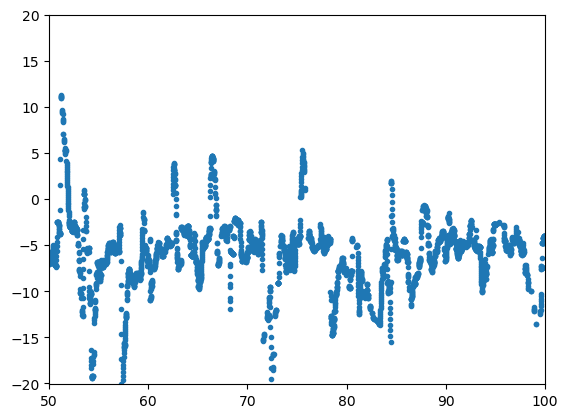

In [138]:

time_c  = [x_ for x_, c_ in zip(time, c) if c_ > 0.8]
plt.ylim([-20.1,20])
plt.xlim([50,100])
plt.plot(time_c, np.array(x_c)*180/np.pi,'.')

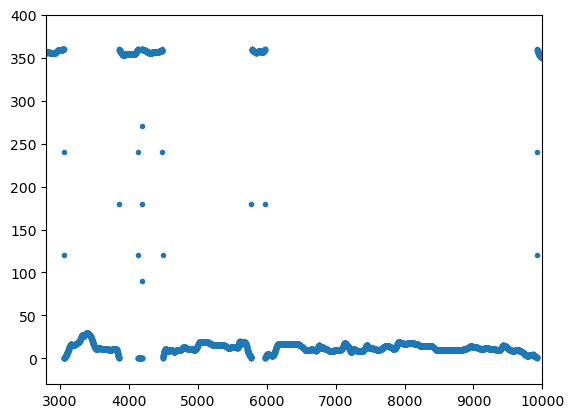

In [143]:
time = (np.array(data.loc[par]['TimeSinceStart'].values))
Head = (np.array(data.loc[par]['head rot y'].values))


time_c  = [x_ for x_, c_ in zip(time, c) if c_ > 0.8]

plt.ylim([-30.1,400])
plt.xlim([2800,10000])
# plt.plot(time_c, np.array(x_c)*180/np.pi,'.')
plt.plot( np.unwrap(np.array(Head)/180*np.pi)*180/np.pi,'.')
plt.plot( np.unwrap(np.array(Head)/180*np.pi)*180/np.pi,'.')

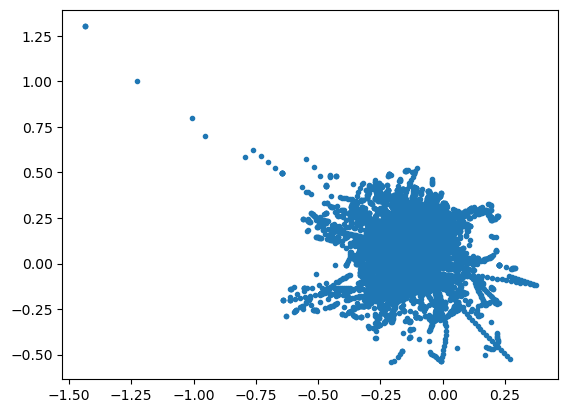

In [109]:
plt.plot(x_c, y_c,'.')


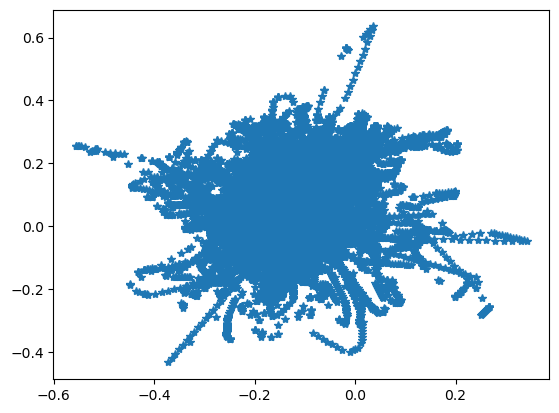

In [91]:


# glasses angle (?)
# x = np.array(data['GazeDirection_x'].values)
# y = np.array(data['GazeDirection_y'].values)
# x = (np.array(data['GazeDirection_x'].values)+180)%360
# y = (np.array(data['GazeDirection_y'].values)+180)%360
# tan x z horizontal angle 
# tan y z vertical angle  
plt.plot(x, y,'*')
# plt.xlim([150,250])
# plt.ylim([150,250])

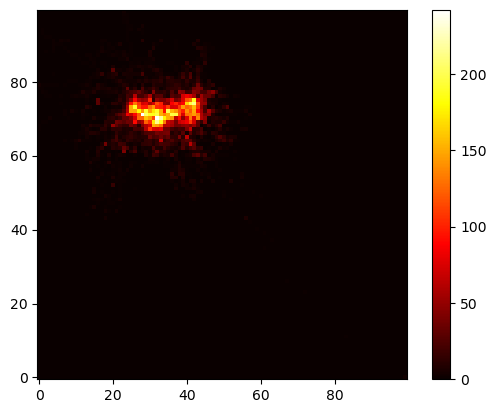

In [110]:
heatmap, xedges, yedges = np.histogram2d(x_c, y_c, bins=100)
plt.imshow(heatmap, cmap='hot', origin='lower')
plt.colorbar()

In [ ]:
def get_trajectory__(self, img):
       
        layer1st_dims = [len(_gaze_cols) + len(_head_cols), utils._nobs]
        # Resize it to make sure it is 32x32
        image = np.resize(img, (32, 32))

        # Calculate the average RGB values
        avg_rgb = np.mean(image, axis=(0, 1))

        # Create a trigonometric correlation using the average RGB values
        x = np.linspace(0, 2 * np.pi, layer1st_dims[1])
        output_matrix = np.empty((layer1st_dims[0], layer1st_dims[1]))

        for i in range(layer1st_dims[1]):
            output_matrix[i, :] = np.sin(x + avg_rgb[i % 3].item())
        
        self.traj_tens = torch.tensor(output_matrix).to(_device)